## The Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)


* Load Data & Packages for model building & preprocessing
* Preprocessing & Missing value imputation


### Loading Packages

In [53]:
# Importing the numpy library for numerical operations and handling large arrays/matrix data.
import numpy as np  

# Importing the pandas library for data manipulation and analysis using dataframes.
import pandas as pd  

# Importing the seaborn library for data visualization with enhanced graphical representations.
import seaborn as sns  

# Importing the pyplot module from matplotlib for creating visual plots and charts.
import matplotlib.pyplot as plt  

# Importing LabelEncoder for converting categorical labels to numerical values.
from sklearn.preprocessing import LabelEncoder  

# Importing StandardScaler for standardizing features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler  

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, \
    StratifiedKFold, \
        train_test_split
from sklearn.metrics import \
roc_auc_score, \
accuracy_score, \
confusion_matrix, \
classification_report, \
roc_curve, \
precision_score, \
recall_score, \
precision_recall_curve \

# Importing the warnings module to handle and manage warnings.
import warnings  

# Suppressing FutureWarning category warnings.
warnings.simplefilter(action='ignore', category=FutureWarning)  

# Suppressing UserWarning category warnings.
warnings.simplefilter(action='ignore', category=UserWarning)  

### Loading Data

In [2]:
# Using pandas to read a CSV file named 'churn_prediction.csv' and storing its content in a dataframe named 'df'.
df = pd.read_csv('churn_prediction.csv')


In [3]:
df.shape

(28382, 21)

In [4]:
# Displaying the first five rows of the dataframe 'df' to get a quick overview of its content and structure.
df.head(7)


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0


In [5]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

### Missing Values
Before we go on to build the model, we must look for missing values within the dataset as treating the missing values  is a necessary step before we fit a logistic regression model on the dataset.

In [6]:
# Calculating the number of missing (NaN) values in each column of the dataframe 'df'.
pd.isnull(df).sum()


customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

The result of this function shows that there are quite a few missing values in columns gender, dependents, city, days since last transaction and Percentage change in credits. Let us go through each of them 1 by 1 to find the appropriate missing value imputation strategy for each of them.

#### Gender

For a quick recall let us look at the categories within gender column

In [7]:
# Counting the occurrences of each unique value in the 'gender' column of the dataframe 'df'.
df['gender'].value_counts()


Male      16548
Female    11309
Name: gender, dtype: int64

In [ ]:
df.gender.value_counts()

So there is a good mix of males and females and arguably missing values cannot be filled with any one of them. We could create a seperate category by assigning the value -1 for all missing values in this column.

Before that, first we will convert the gender into 0/1 and then replace missing values with -1

In [8]:
# Creating a dictionary to map gender values: 'Male' to 1 and 'Female' to 0.
dict_gender = {'Male': 1, 'Female':0}

# Replacing the 'gender' column values in the dataframe 'df' based on the mapping provided by 'dict_gender'.
df.replace({'gender': dict_gender}, inplace = True)

# Filling any missing (NaN) values in the 'gender' column with -1.
df['gender'] = df['gender'].fillna(-1)


In [9]:
df.head(7)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1.0,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,-1.0,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,0.0,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,1.0,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0


#### Dependents, occupation and city with mode

Next we will have a quick look at the dependents & occupations column and impute with mode as this is sort of an ordinal variable

In [10]:
# Counting the occurrences of each unique value in the 'dependents' column of the dataframe 'df'.
df['dependents'].value_counts()


0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [11]:
df.dependents.max()

52.0

In [12]:
# Counting the occurrences of each unique value in the 'occupation' column of the dataframe 'df'.
df['occupation'].value_counts()


self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [15]:
dependants_mode = df.dependents.mode()
dependants_mode

0    0.0
Name: dependents, dtype: float64

In [14]:
# Filling any missing (NaN) values in the 'dependents' column with 0.
df['dependents'] = df['dependents'].fillna(0)

# Filling any missing (NaN) values in the 'occupation' column with the string 'self_employed'.
df['occupation'] = df['occupation'].fillna('self_employed')


Similarly City can also be imputed with most common category 1020

In [16]:
df.city.value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

In [17]:
# Filling any missing (NaN) values in the 'city' column with the value 1020.
df['city'] = df['city'].fillna(1020)


#### Days since Last Transaction
A fair assumption can be made on this column as this is number of days since last transaction in 1 year, we can substitute missing values with a value greater than 1 year say 999

In [18]:
# Filling any missing (NaN) values in the 'days_since_last_transaction' column with the value 999.
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)


In [19]:
pd.isnull(df).sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Preprocessing

Now, before applying linear model such as logistic regression, we need to scale the data and keep all features as numeric strictly. 


### Dummies with Multiple Categories

In [20]:
df.occupation.unique()

array(['self_employed', 'salaried', 'retired', 'student', 'company'],
      dtype=object)

In [21]:
# Creating one-hot encoded columns for each unique value in the 'occupation' column of the dataframe 'df'.
# The new columns will have a prefix of 'occupation_' followed by the unique value from the 'occupation' column.
# The resulting one-hot encoded columns are then concatenated to the original 'df' dataframe along the columns axis (axis=1).
df = pd.concat([df, pd.get_dummies(df['occupation'], prefix=str('occupation'), prefix_sep='_')], axis=1)


In [22]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


### Scaling Numerical Features

Now, we remember that there are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features if you recall from the EDA. We will take 2 steps to deal with that here:
* Log Transformation
* Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and we have done that here after doing log transformation on all balance features.

In [23]:
# Defining a list of numerical columns that will undergo transformation.
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

# Applying a logarithmic transformation to each numerical column in the dataframe 'df'.
# Adding 17000 before taking the logarithm to ensure non-negative values and avoid mathematical errors.
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

# Initializing a StandardScaler object to standardize the numerical columns.
std = StandardScaler()

# Applying the standardization to the numerical columns and transforming them.
# The result is a standardized version of the original data.
scaled = std.fit_transform(df[num_cols])

# Converting the standardized numpy array back to a pandas DataFrame and retaining the original column names.
scaled = pd.DataFrame(scaled, columns=num_cols)


In [24]:
scaled.head()

,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,-0.341470,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,-0.341470,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,-0.341470,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,-0.341470,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,1.172658,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


### Some notes on Logarithmic transformation 
* ##### _Transforming Skewed Data:_ <br> Many statistical techniques assume that data is normally distributed. If the original data is skewed, taking the logarithm can help in making the data more normal-like. This is especially useful for models that assume normality.
* ##### _Stabilizing Variance:_ <br> In some datasets, the variance of data increases as the data values increase. Log transformation can help stabilize this variance across the range of data.
* ##### _Managing Exponential Growth:_ <br> If the original data represents exponential growth (e.g., population growth, compound interest), taking the logarithm can linearize the growth rate, making it easier to model and interpret.
* ##### _Reducing the Impact of Outliers:_ <br> Logarithmic transformation can reduce the impact of outliers. Since it compresses the scale on which data is measured, it can make patterns more visible and data more manageable.

In [25]:
# Creating a copy of the original dataframe 'df' and storing it in 'df_df_og' for backup or future reference.
df_df_og = df.copy()



In [26]:
# Dropping the columns listed in 'num_cols' from the dataframe 'df'.
df = df.drop(columns=num_cols , axis=1)

In [27]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,41,999.0,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,388,58.0,1,0,0,0,1,0


In [28]:
# Merging the 'df' dataframe with the 'scaled' dataframe based on their indices.
# The 'left' merge ensures that only rows with matching indices in 'df' and 'scaled' are included in the result.
df = df.merge(scaled, left_index=True, right_index=True, how="left")

In [29]:
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732
5,7,263,42,0.0,0.0,self_employed,1096.0,1666,60.0,0,...,1.187525,1.266262,1.104568,1.216681,-0.313896,-0.324453,-0.190716,-0.315874,1.251029,1.216379
6,8,5922,72,1.0,0.0,retired,1020.0,1,98.0,0,...,0.236908,0.318438,0.809959,0.325970,-0.313835,-0.324393,-0.102459,-0.283327,0.230467,0.318691
7,9,1145,46,1.0,0.0,self_employed,623.0,317,172.0,0,...,0.628769,0.422909,1.370393,0.134306,-0.313915,-0.324472,-0.275436,0.687345,0.429957,-0.029314
8,10,2132,31,1.0,0.0,salaried,1096.0,4110,19.0,0,...,-0.631824,-0.650571,-0.690442,-0.652511,-0.161328,-0.298773,-0.219727,-0.300250,-0.703441,-0.594503
9,11,3379,40,1.0,3.0,self_employed,1020.0,38,0.0,0,...,-0.051856,-0.174442,-0.555277,-0.567878,0.950999,0.477743,0.011601,-0.095771,-0.588407,-0.496438


In [30]:
# Extracting the 'churn' column from the dataframe 'df' and storing it in 'y_all' for use as a target variable.
y_all = df.churn

# Dropping the 'churn', 'customer_id', and 'occupation' columns from the dataframe 'df'.
df = df.drop(['churn', 'customer_id', 'occupation'], axis=1)


In [31]:
df.columns

Index(['vintage', 'age', 'gender', 'dependents', 'city', 'branch_code',
       'days_since_last_transaction', 'occupation_company',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student', 'customer_nw_category', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ2',
       'average_monthly_balance_prevQ', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

In [32]:
df.head()

,vintage,age,gender,dependents,city,branch_code,days_since_last_transaction,occupation_company,occupation_retired,occupation_salaried,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,3135,66,1.0,0.0,187.0,755,224.0,0,0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,310,35,1.0,0.0,1020.0,3214,60.0,0,0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,2356,31,1.0,0.0,146.0,41,999.0,0,0,1,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,478,90,-1.0,0.0,1020.0,582,147.0,0,0,0,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,2531,42,1.0,2.0,1494.0,388,58.0,0,0,0,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


## Model Building and Evaluation Metrics

### Conclusions from EDA
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might be turn out to be an important feature
* For all the balance features the lower values have much higher proportion of churning customers
* For most frequent vintage values, the churning customers are slightly higher, while for higher values of vintage, we have mostly non churning customers which is in sync with the age variable 
* We see significant difference for different occupations and certainly would be interesting to use as a feature for prediction of churn.

Now, we will first split our dataset into test and train and using the above conclusions select columns and build a baseline logistic regression model to check the ROC-AUC Score & the confusion matrix

In [33]:
df.shape

(28382, 23)

### Baseline Columns

In [34]:
df.columns

Index(['vintage', 'age', 'gender', 'dependents', 'city', 'branch_code',
       'days_since_last_transaction', 'occupation_company',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student', 'customer_nw_category', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ2',
       'average_monthly_balance_prevQ', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

In [35]:
baseline_cols = ['current_month_debit', 
                 'previous_month_debit',
                 'current_balance',
                 'previous_month_end_balance',
                 'vintage',
                 'occupation_retired', 
                 'occupation_salaried',
                 'occupation_self_employed', 
                 'occupation_student']

In [36]:
df_baseline = df[baseline_cols]

## Exercise

In [37]:
# 1. Check the length of the baseline-cols
df_baseline.shape

(28382, 9)

**Train Test Split**

In [38]:
# 2. Split the data into Train and test set. 
# Test size = 1/3 of the data. Set random state to 11
X_train, X_test, y_train, y_test = train_test_split(
    df_baseline, y_all, test_size=0.33, random_state=11)

In [39]:
# 3. Check the shape of xtrain and ytrain
X_train.shape, y_train.shape

((19015, 9), (19015,))

In [40]:
# 4. Display the first 5 values of ytrain
y_train[:5]

25261    0
17938    0
19256    0
3516     0
3949     0
Name: churn, dtype: int64

In [41]:
# 5. Create a logistic regression model and fit the training data
log_reg_model = LogisticRegression(random_state=11)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=11)

In [42]:
pred = log_reg_model.predict_proba(X_test)[:, 1]

In [43]:
# Display the first 5 values of pred
pred[:5]

array([0.17948616, 0.15216133, 0.17099794, 0.18618806, 0.14686687])

### AUC ROC Curve & Confusion Matrix


Now, let us quickly look at the AUC-ROC curve for our logistic regression model and also the confusion matrix to see where the logistic regression model is failing here.

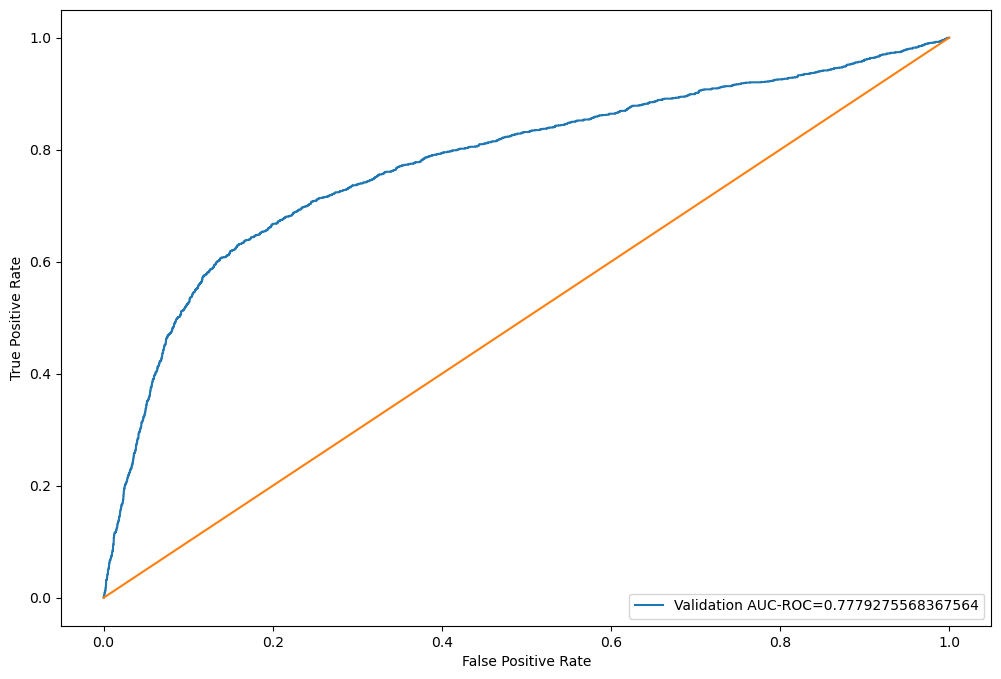

In [54]:

fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [46]:
# Confusion Matrix
pred_val = log_reg_model.predict(X_test)

In [47]:
pred_val[:5]

array([0, 0, 0, 0, 0])

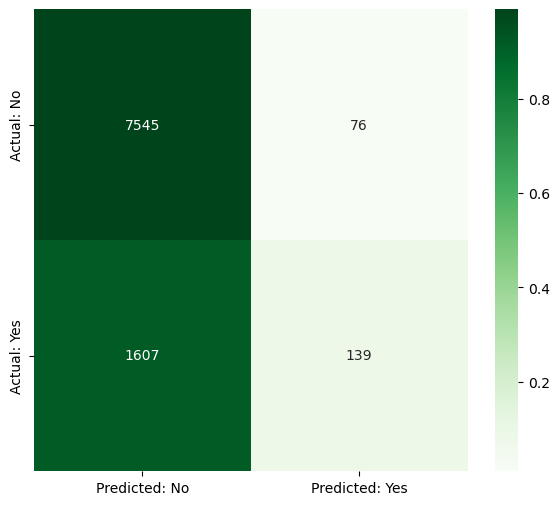

In [49]:
label_preds = pred_val

cm = confusion_matrix(y_test,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='Greens'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm)

In [55]:
#Generate the classification report
# This includes precision, recall, F1-score, and support for each class
report = classification_report(y_test, label_preds)

# Step 3: Calculate accuracy separately
accuracy = accuracy_score(y_test, label_preds)

# Step 4: Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(report)

Accuracy: 0.8203

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      7621
           1       0.65      0.08      0.14      1746

    accuracy                           0.82      9367
   macro avg       0.74      0.53      0.52      9367
weighted avg       0.79      0.82      0.76      9367



### Based on the classification report in the image, here is the interpretation of the metrics:

##### Overall Model Performance:
 - Accuracy: 0.8203 (82.03%)
   This means that the model correctly classified 82.03% of the test samples.

##### Class-wise Performance:
* Class 0 (Majority Class):

   - Precision: 0.82 : Out of all the predictions made for class 0, 82% were correct.
   - Recall: 0.99 : The model successfully identified 99% of all actual class 0 samples.
   - F1-Score: 0.90 : The F1 score, which balances precision and recall, is 0.90, indicating a good balance.
   - Support: 7621 : The number of actual occurrences of class 0 in the dataset is 7621.

* Class 1 (Minority Class):

   - Precision: 0.65 : Out of all the predictions made for class 1, 65% were correct. This suggests the model struggles more with class 1 predictions.
   - Recall: 0.08 : Only 8% of the actual class 1 samples were identified correctly. This shows that the model has a poor recall for class 1, meaning it misses a large number of true positives in this class.
   - F1-Score: 0.14 : The F1 score is 0.14, which is quite low, indicating an imbalance between precision and recall.
   - Support: 1746 : The number of actual occurrences of class 1 in the dataset is 1746, which indicates a class imbalance in the dataset (as class 1 has far fewer instances than class 0).
* Macro and Weighted Averages:
   - Macro Average:
      - Precision: 0.74, Recall: 0.53, F1-Score: 0.52
      - These are unweighted averages of the precision, recall, and F1 scores across both classes. They give an idea of the model's performance across all classes, without accounting for the class imbalance.
   - Weighted Average:
      - Precision: 0.79, Recall: 0.82, F1-Score: 0.76
      - These are the weighted averages of precision, recall, and F1-score, which take into account the support (the number of true instances for each class). The model performs well in terms of weighted metrics because class 0 dominates the dataset.
* Key Insights:
   - The model is biased towards class 0, which is the majority class. 
   - It performs very well on class 0 but struggles with class 1.
   - The recall for class 1 is particularly low (0.08), meaning the model is missing many of the actual instances of class 1.

   - The class imbalance (7621 for class 0 vs 1746 for class 1) could be contributing to this performance discrepancy. Addressing the class imbalance through techniques like oversampling, undersampling, or class weighting might improve the performance for class 1.


Logistic regression may not always be the best choice for highly imbalanced datasets. Here are other algorithms that may perform better in such cases:

* Random Forest
* XGBoost

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=11)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=11)

In [57]:
rf_pred = rf_model.predict(X_test)

In [59]:
# Generate the classification report
# This includes precision, recall, F1-score, and support for each class
rf_report = classification_report(y_test, rf_pred)

# Step 3: Calculate accuracy separately
rf_accuracy = accuracy_score(y_test, rf_pred)

# Step 4: Display the results
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nRandom Forest Classification Report:\n")
print(rf_report)

Random Forest Accuracy: 0.8518

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7621
           1       0.69      0.37      0.48      1746

    accuracy                           0.85      9367
   macro avg       0.78      0.66      0.70      9367
weighted avg       0.84      0.85      0.83      9367



In [61]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(
    y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_pred = xgb_model.predict(X_test)

In [63]:
# Generate the classification report
# This includes precision, recall, F1-score, and support for each class
xgb_report = classification_report(y_test, xgb_pred)

# Step 3: Calculate accuracy separately
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Step 4: Display the results
print(f"XGB Accuracy: {xgb_accuracy:.4f}")
print("\nXGB Classification Report:\n")
print(xgb_report)

XGB Accuracy: 0.8078

XGB Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      7621
           1       0.49      0.61      0.54      1746

    accuracy                           0.81      9367
   macro avg       0.70      0.73      0.71      9367
weighted avg       0.83      0.81      0.82      9367



Other strategies to try:
- Resampling Techniques:
  - Oversampling the minority class (Class 1): You can duplicate or synthesize more instances of the minority class to balance the dataset. The popular technique for this is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic data points for the minority class.
  - Undersampling the majority class (Class 0): You can reduce the number of instances in the majority class by randomly removing samples, which can help balance the class distributions.
- Class Weighting:
  - Assign a higher weight to class 1 during model training. This penalizes misclassification of class 1 more than class 0. In Logistic Regression, you can use the <i>class_weight</i> parameter, where the <i>'balanced'</i> option automatically adjusts weights inversely proportional to class frequencies. You can also manually specify weights, e.g., class_weight={0: 1, 1: 3} if class 1 is 3 times less frequent.